###### Atelier proposé par Dr BENDIABDALLAH HAKIM  hakim.bendiabdallah@gmail.com
# **Définition du jeu de données NSL-KDD**
Le **jeu de données NSL-KDD** est une base de données utilisée pour l'entraînement et l'évaluation des **systèmes de détection d'intrusions (IDS)** basés sur l'apprentissage automatique. Il contient des enregistrements de **connexions réseau** avec des caractéristiques détaillées permettant d'identifier si une activité réseau est **normale** ou **malveillante**.

Chaque enregistrement représente une connexion réseau avec plusieurs attributs qui décrivent ses caractéristiques techniques et comportementales. L'objectif est de permettre l'entraînement de modèles capables de **classifier** ces connexions en **normales** ou en **attaques**, en fonction des paramètres fournis.

---

## **Caractéristiques des données**
Chaque connexion réseau est décrite par **41 attributs**, qui peuvent être classés en trois grandes catégories :

### **1️⃣ Attributs de base (Basic features)**
Ces paramètres décrivent les propriétés générales de la connexion :
- **duration** : durée de la connexion (en secondes).
- **protocol_type** : type de protocole utilisé (**TCP, UDP, ICMP**).
- **service** : type de service réseau utilisé (**HTTP, FTP, SSH, etc.**).
- **flag** : état de la connexion (**SF (Successful – Finished) , REJ (Rejected), RSTO (Reset by Originator), etc.**).
- **src_bytes** : volume de données envoyées depuis la source vers la destination.
- **dst_bytes** : volume de données envoyées depuis la destination vers la source.
- **land** : indicateur si la connexion a la même source et destination (1 = oui, 0 = non).
- **wrong_fragment** : nombre de fragments incorrects dans la connexion.
- **urgent** : nombre de paquets urgents.

### **2️⃣ Attributs basés sur le contenu (Content features)**
Ces paramètres analysent le contenu des connexions, en particulier pour détecter les attaques nécessitant une authentification :
- **hot** : nombre de fichiers d'accès sensibles créés pendant la connexion.
- **num_failed_logins** : nombre de tentatives de connexion échouées.
- **logged_in** : connexion réussie (1 = oui, 0 = non).
- **num_compromised** : nombre d'intrusions réussies détectées.
- **root_shell** : accès au shell root (1 = oui, 0 = non).
- **su_attempted** : tentative d'utilisation de la commande "su" (1 = oui, 0 = non).
- **num_root** : nombre de requêtes root exécutées.
- **num_file_creations** : nombre de fichiers créés pendant la connexion.
- **num_shells** : nombre de shells ouverts.
- **num_access_files** : nombre de fichiers sensibles consultés.
- **num_outbound_cmds** : nombre de commandes envoyées à distance.
- **is_host_login** : connexion depuis un hôte spécifique (1 = oui, 0 = non).
- **is_guest_login** : connexion en tant qu'utilisateur invité (1 = oui, 0 = non).

### **3️⃣ Attributs basés sur le trafic (Traffic features)**
Ces paramètres évaluent la connexion en comparant avec d'autres connexions similaires sur une période donnée :
- **count** : nombre total de connexions sur les dernières secondes.
- **srv_count** : nombre total de connexions vers le même service.
- **serror_rate** : taux de connexions avec des erreurs SYN.
- **srv_serror_rate** : taux de connexions au même service avec des erreurs SYN.
- **rerror_rate** : taux de connexions avec des erreurs de réponse.
- **srv_rerror_rate** : taux de connexions au même service avec des erreurs de réponse.
- **same_srv_rate** : taux de connexions vers le même service.
- **diff_srv_rate** : taux de connexions vers des services différents.
- **srv_diff_host_rate** : taux de connexions vers des hôtes différents sur le même service.
- **dst_host_count** : nombre de connexions vers la même destination.
- **dst_host_srv_count** : nombre de connexions vers le même service et destination.
- **dst_host_same_srv_rate** : taux de connexions vers le même service pour une destination donnée.
- **dst_host_diff_srv_rate** : taux de connexions vers différents services pour une destination.
- **dst_host_same_src_port_rate** : taux de connexions ayant le même port source.
- **dst_host_srv_diff_host_rate** : taux de connexions vers des services différents pour différents hôtes.
- **dst_host_serror_rate** : taux de connexions en erreur SYN pour une destination.
- **dst_host_srv_serror_rate** : taux de connexions en erreur SYN vers un même service et destination.
- **dst_host_rerror_rate** : taux de connexions en erreur de réponse pour une destination.
- **dst_host_srv_rerror_rate** : taux de connexions en erreur de réponse vers un même service et destination.

---

## **Classes de sortie**
Le jeu de données **NSL-KDD** permet de classer chaque connexion en fonction de son **type** :

### **1️⃣ Classe "Normale"**
- **normal** : connexion réseau légitime, sans comportement suspect.

### **2️⃣ Classes "Attaque"**
Les attaques sont réparties en **quatre grandes catégories** :

| **Catégorie d’attaque**         | **Description**                                                                                | **Exemples d’attaques**                         |
|----------------------------------|------------------------------------------------------------------------------------------------|-------------------------------------------------|
| **DoS (Denial of Service)**      | Attaques visant à rendre un service ou un réseau indisponible en le surchargeant.               | **Neptune, Smurf, Teardrop, Pod, Land**           |
| **Probe (Reconnaissance)**       | Scans du réseau pour collecter des informations sur les services actifs et les vulnérabilités.  | **Nmap, Satan, Ipsweep, Portsweep**              |
| **R2L (Remote to Local)**        | Tentative d’accès à un système depuis un hôte distant sans authentification valide.            | **ftp_write, guess_passwd, warezclient, imap, phf** |
| **U2R (User to Root)**           | Exploitation d’une vulnérabilité pour obtenir un accès root (administrateur) sur un système.     | **buffer_overflow, rootkit, perl, loadmodule**    |

---


# Importation des bibliothèques nécessaires

In [ ]:
# Importation des bibliothèques courantes
import numpy as np  # Pour les calculs numériques
import pandas as pd  # Pour la manipulation de données
import warnings  # Pour gérer les avertissements
import matplotlib.pyplot as plt  # Pour la visualisation
import seaborn as sns  # Pour des visualisations avancées
from sklearn import tree  # Pour les arbres de décision
from sklearn.linear_model import LogisticRegression  # Pour la régression logistique
from sklearn.neighbors import KNeighborsClassifier  # Pour le classificateur KNN
from sklearn.tree import DecisionTreeClassifier  # Pour les arbres de décision
from sklearn.preprocessing import RobustScaler  # Pour la normalisation robuste des données
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Pour la forêt aléatoire
from sklearn.model_selection import train_test_split  # Pour diviser les données en ensembles d'entraînement et de test
from sklearn import svm  # Pour les machines à vecteurs de support
from sklearn import metrics  # Pour évaluer les performances des modèles
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes des DataFrames
warnings.filterwarnings('ignore')  # Ignorer les avertissements
%matplotlib inline

# Chargement de la base de données

In [ ]:
!wget -O KDDTrain.zip "https://github.com/hakimben13000/ML-NSL-KDD/raw/main/KDDTrain.zip"

In [ ]:
# Décompression du fichier ZIP contenant le dataset NSL-KDD
import zipfile
import os
zip_file = "KDDTrain.zip"  # Nom du fichier ZIP
output_folder = "nslkdd"  # Dossier de destination
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_folder)  # Extraction du contenu du ZIP

print(f"Fichiers extraits dans le dossier: {output_folder}")

In [ ]:
# Lecture du jeu de données d'entraînement
local_path = "nslkdd/"  # Chemin local vers le dossier contenant le dataset
data_train = pd.read_csv(local_path + "KDDTrain+.txt", header=None)  # Lecture du fichier CSV

# Exploration du jeu de données

In [ ]:
# Affichage des premières lignes du dataset
data_train.head()

In [ ]:
# Définition des noms de colonnes pour le dataset NSL-KDD
columns = ([
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
    'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
    'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
    'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'
])

In [ ]:
# Attribution des noms de colonnes au DataFrame
data_train.columns = columns

In [ ]:
# Affichage des premières lignes après attribution des colonnes
data_train.head()

In [ ]:
data_train.iloc[[2]]


In [ ]:
# Affichage des informations générales du DataFrame
data_train.info()

In [ ]:
# Vérification de la présence de valeurs manquantes
data_train.isnull().sum()

In [ ]:
# Statistiques descriptives du DataFrame
data_train.describe()

In [ ]:
# Conversion des valeurs de la colonne 'outcome'
# Si la valeur est 'normal', on la conserve, sinon on la remplace par 'attack'
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

In [ ]:
# Définition d'une fonction pour tracer des graphiques en secteurs (pie plot)
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)  # Création d'un subplot avec le nombre de lignes et colonnes spécifié
    for ax, col in zip(axes.ravel(), cols_list):
        # Tracer le graphique en secteurs pour chaque colonne
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize=12)
    plt.show()


## Visualisation

In [ ]:
# Visualisation de la répartition des types de protocole et de l'issue (normal/attack)
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)

In [ ]:
# Visualisation de la répartition des connexions réussies ('logged_in') et des connexions en tant qu'invité ('is_guest_login')
pie_plot(data_train, ['logged_in', 'is_guest_login'], 1, 2)

## Prétraitement des données

Cette partie se résume à deux étapes :  

* **Scaling** : Transforme les données pour qu'elles se situent dans un intervalle spécifique.  
* **Préparation du jeu de données** pour la tâche d'apprentissage automatique.  

In [ ]:
# Fonction pour normaliser les données numériques à l'aide de RobustScaler
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)  # Application du scaler
    std_df = pd.DataFrame(std_scaler_temp, columns=cols)  # Reconstruction d'un DataFrame avec les colonnes d'origine
    return std_df


In [ ]:


# Fonction de prétraitement : mise à l'échelle des colonnes numériques, conversion de 'outcome' en valeurs numériques et transformation des colonnes catégorielles en variables indicatrices
def preprocess(dataframe,isPrediction=0):
    # Définition des colonnes catégorielles
    if isPrediction == 0 :
      cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
    else:
      cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login']
    df_num = dataframe.drop(cat_cols, axis=1)  # Suppression des colonnes catégorielles pour ne garder que les colonnes numériques
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)  # Normalisation des colonnes numériques

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)  # Suppression des colonnes numériques non normalisées
    dataframe[num_cols] = scaled_df[num_cols]  # Ajout des colonnes normalisées

    # Conversion de la colonne 'outcome' : 'normal' -> 0, sinon -> 1
    if isPrediction == 0 :
        dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
        dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1

    # Transformation des colonnes catégorielles en variables indicatrices
    dataframe = pd.get_dummies(dataframe, columns=['protocol_type', 'service', 'flag'])
    return dataframe


In [ ]:
# Application du prétraitement sur le jeu de données d'entraînement
scaled_train = preprocess(data_train)

In [ ]:
# Affichage des noms des colonnes après prétraitement
scaled_train.columns

In [ ]:
# Séparation des variables explicatives et de la variable cible
x = scaled_train.drop(['outcome', 'level'], axis=1).values
y = scaled_train['outcome'].values

In [ ]:
# Conversion de la variable cible en entier et séparation en ensembles d'entraînement et de test
y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Construction du modèle

Voici les équations pour les métriques d'évaluations : **Accuracy**, **Précision** et **Rappel** :

\begin{array}{|c|c|}
\hline
\text{Métrique} & \text{Équation} \\
\hline
\text{Accuracy} & \frac{TP + TN}{TP + TN + FP + FN} \\
\hline
\text{Précision} & \frac{TP}{TP + FP} \\
\hline
\text{Rappel} & \frac{TP}{TP + FN} \\
\hline
\end{array}

Où :
- **TP (True Positives)** : Nombre de vrais positifs (prédictions positives correctes).
- **TN (True Negatives)** : Nombre de vrais négatifs (prédictions négatives correctes).
- **FP (False Positives)** : Nombre de faux positifs (prédictions positives incorrectes).
- **FN (False Negatives)** : Nombre de faux négatifs (prédictions négatives incorrectes).

In [ ]:
# Fonction d'évaluation d'un modèle de classification
# Calcule l'exactitude, la précision et le rappel sur les ensembles d'entraînement et de test,
# et affiche la matrice de confusion.
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    # Calcul de l'accuracy (taux de classification)
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    # Calcul de la précision
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    # Calcul du rappel
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Accuracy Entraînement " + str(name) + " {}  Accuracy Test ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Précision Entraînement " + str(name) + " {}  Précision Test ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Rappel Entraînement " + str(name) + " {}  Rappel Test ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)


## Régression Logistique


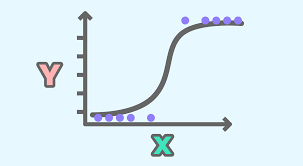

La **régression logistique** est un algorithme de classification supervisée qui permet de prédire la probabilité qu'une observation appartienne à une certaine classe. Elle utilise la **fonction sigmoïde** pour convertir une combinaison linéaire des variables d’entrée en une probabilité comprise entre 0 et 1. Elle est principalement utilisée pour des problèmes de **classification binaire** (ex. : Attaque ou non).


In [ ]:
# Entraînement d'un modèle de régression logistique
lr = LogisticRegression().fit(x_train, y_train)
# Évaluation du modèle de régression logistique
evaluate_classification(lr, "Régression Logistique", x_train, x_test, y_train, y_test)

## K-Nearest Neighbors (KNN)

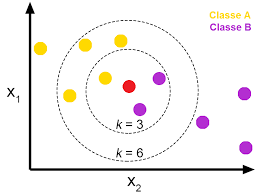



L'algorithme **K-Nearest Neighbors (KNN)** est une méthode d’apprentissage supervisée utilisée pour la **classification** et la **régression**. Il classe une nouvelle observation en fonction de ses **K voisins les plus proches** dans l’espace des caractéristiques. L’étiquette de la classe est déterminée par un vote majoritaire parmi ces voisins. KNN est un algorithme **non paramétrique** et **basé sur la distance**, souvent mesurée avec la distance **euclidienne**.


In [ ]:
# Entraînement d'un modèle KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
# Évaluation du modèle KNN
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

## Machines à vecteurs de support (SVM)

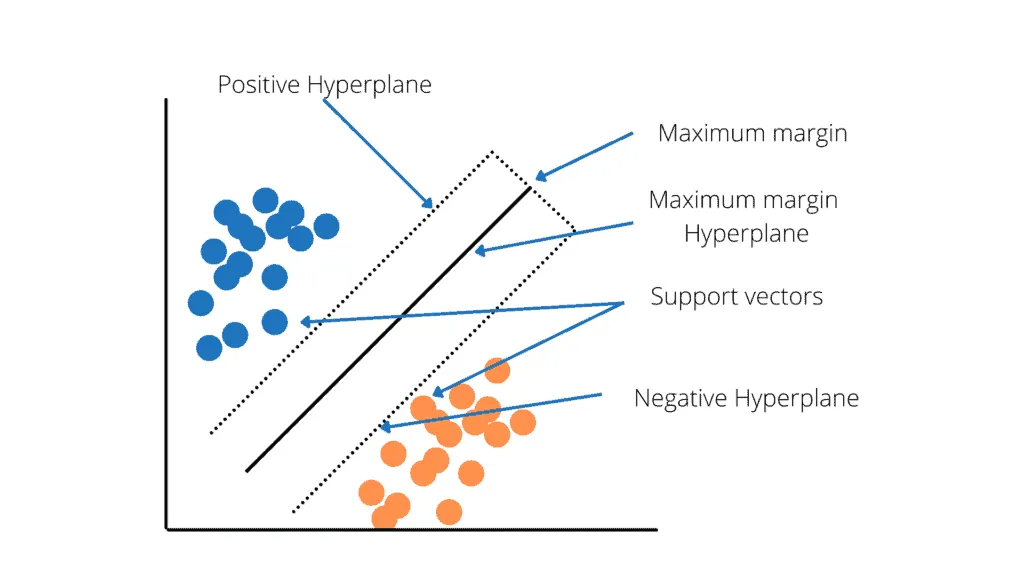


L'algorithme **Support Vector Machine (SVM)** est une méthode d'apprentissage supervisée utilisée pour la **classification** et la **régression**. Il cherche à trouver une **hyperplan optimal** qui sépare les classes avec la **plus grande marge possible**. SVM peut utiliser des **kernels** pour transformer les données et rendre la séparation possible même dans des espaces non linéaires. C’est un algorithme efficace pour les problèmes de classification binaire et multi-classes.


In [ ]:
# Entraînement d'un modèle SVM linéaire
lin_svc = svm.LinearSVC().fit(x_train, y_train)
# Évaluation du modèle SVM linéaire
evaluate_classification(lin_svc, "Linear SVC (Implémentation basée sur LinearSVC)", x_train, x_test, y_train, y_test)

## Arbre de décision
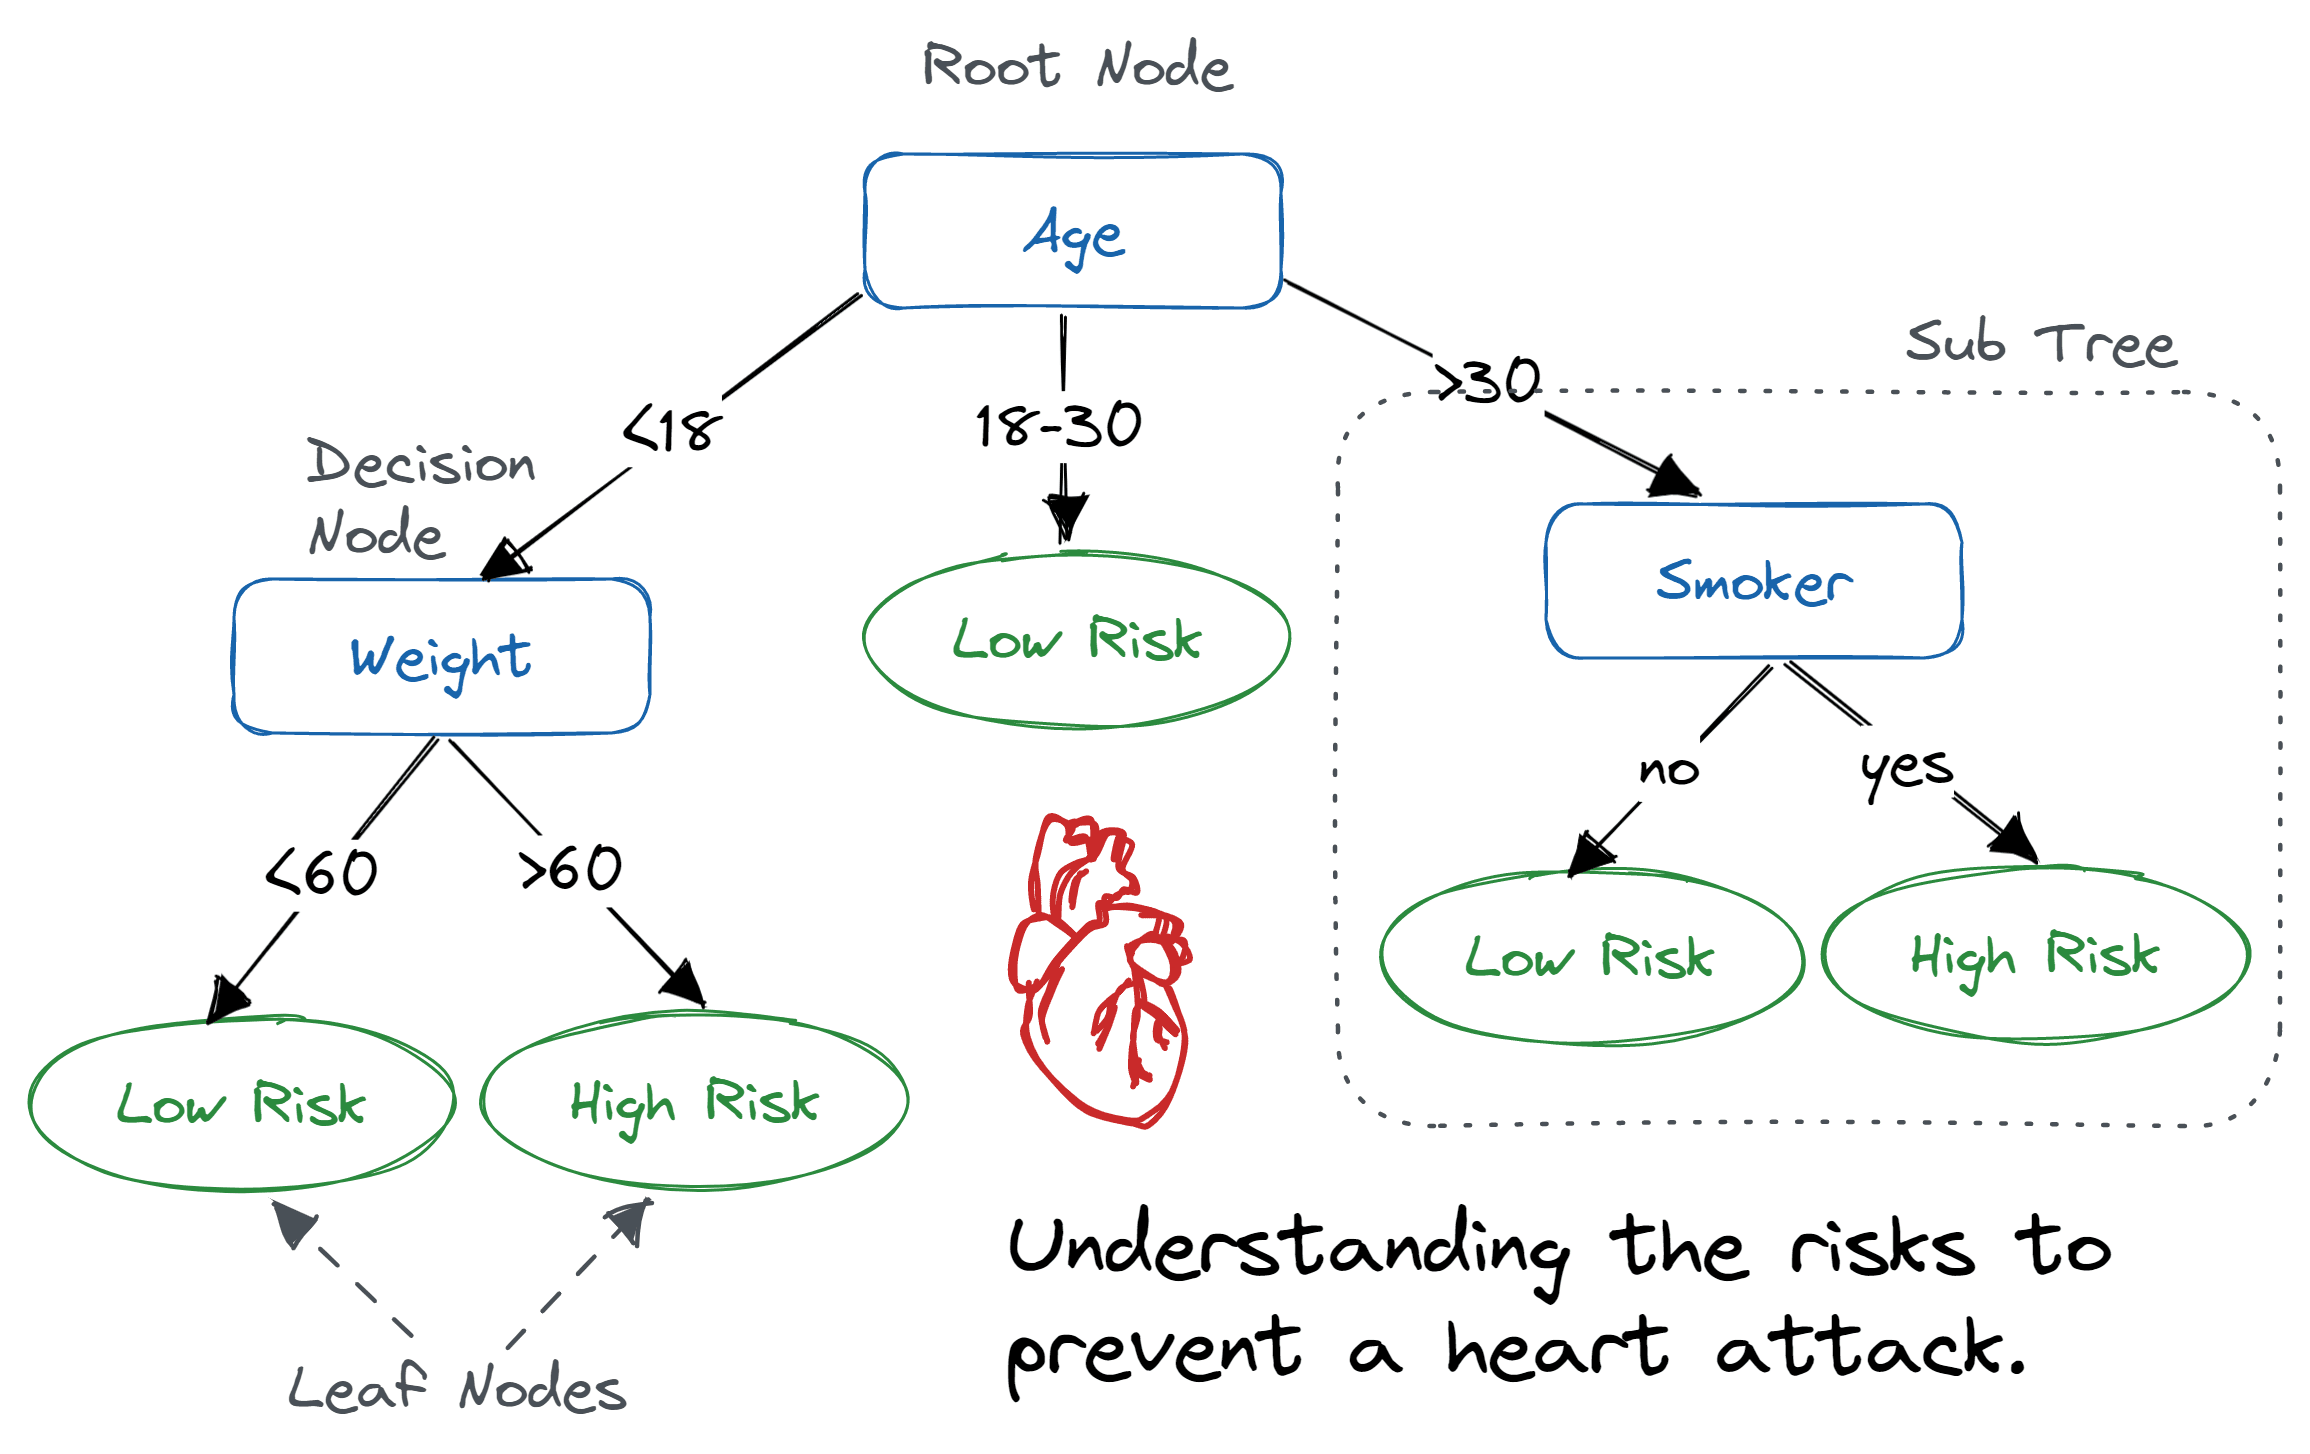


L'**arbre de décision** est un algorithme d’apprentissage supervisé utilisé pour la **classification** et la **régression**. Il fonctionne en divisant les données en sous-groupes selon des **questions successives** basées sur les caractéristiques. Chaque nœud représente un test sur une variable, chaque branche une réponse possible, et chaque feuille une prédiction. L’arbre est construit en maximisant l’homogénéité des classes dans les feuilles, en utilisant des critères comme **l’entropie** ou **l’indice de Gini**.


In [ ]:
# Entraînement d'un arbre de décision avec profondeur maximale de 3
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
# Entraînement d'un arbre de décision sans limitation de profondeur
tdt = DecisionTreeClassifier().fit(x_train, y_train)
# Évaluation de l'arbre de décision sans limitation de profondeur
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

In [ ]:
# Fonction pour afficher l'importance des caractéristiques pour un modèle
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Afficher toutes les caractéristiques
    if top == -1:
        top = len(names)

    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('Importance des caractéristiques pour larbre de décision')
    plt.show()

features_names = data_train.drop(['outcome', 'level'], axis=1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

In [ ]:
# Affichage graphique de l'arbre de décision
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt, filled=True)

## Forêt aléatoire

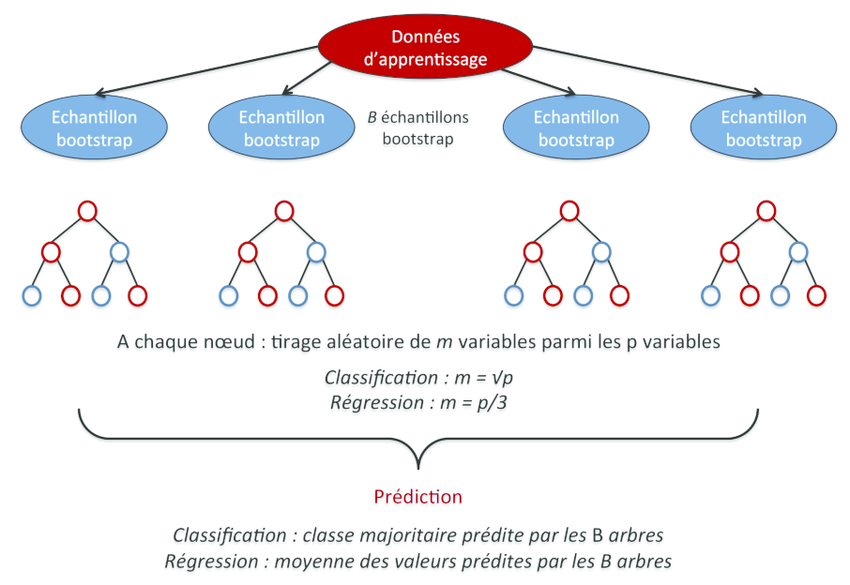

### Définition de l'algorithme de la Forêt Aléatoire (Random Forest)

L'**algorithme de la Forêt Aléatoire** est un modèle d’apprentissage supervisé utilisé pour la **classification** et la **régression**. Il repose sur un **ensemble d’arbres de décision** entraînés sur des sous-échantillons des données. La prédiction finale est obtenue par **vote majoritaire** (classification) ou **moyenne des prédictions** (régression). Cet algorithme réduit le risque de surapprentissage (**overfitting**) et améliore la robustesse par rapport à un arbre de décision unique.


In [ ]:
# Entraînement d'un modèle de forêt aléatoire
rf = RandomForestClassifier().fit(x_train, y_train)
# Évaluation du modèle de forêt aléatoire
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

In [ ]:
# Affichage des importances des caractéristiques pour le modèle de forêt aléatoire
f_importances(abs(rf.feature_importances_), features_names, top=18)

# Comparaison des modèles

In [ ]:
# Récupération des clés et valeurs d'évaluation pour la visualisation
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
# Tracé des barres pour l'exactitude sur l'ensemble d'entraînement et de test
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Accuracy apprentissage", "Accuracy Test"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Tracé des barres pour la précision sur l'ensemble d'entraînement et de test
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Précision d'aprenttissage", "Précision Test"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Précision")
plt.show()

In [ ]:
# Tracé des barres pour le rappel sur l'ensemble d'entraînement et de test
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[4] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[5] for value in values], color='b', width=0.25, align='center')
ax.legend(["Rappel d'apprentissage", "Rappel Test"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Rappel")
plt.show()

# Prediction d'un exemple de données

In [ ]:
# Exemple de données de test (un seul enregistrement)
test_data = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 'tcp',
    'service': 'http',
    'flag': 'SF',
    'src_bytes': 215,
    'dst_bytes': 45076,
    'land': 0,
    'wrong_fragment': 0,
    'urgent': 0,
    'hot': 0,
    'num_failed_logins': 0,
    'logged_in': 1,
    'num_compromised': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_root': 0,
    'num_file_creations': 0,
    'num_shells': 0,
    'num_access_files': 0,
    'num_outbound_cmds': 0,
    'is_host_login': 0,
    'is_guest_login': 0,
    'count': 1,
    'srv_count': 1,
    'serror_rate': 0,
    'srv_serror_rate': 0,
    'rerror_rate': 0,
    'srv_rerror_rate': 0,
    'same_srv_rate': 1,
    'diff_srv_rate': 0,
    'srv_diff_host_rate': 0,
    'dst_host_count': 1,
    'dst_host_srv_count': 25,
    'dst_host_same_srv_rate': 0.17,
    'dst_host_diff_srv_rate': 0.03,
    'dst_host_same_src_port_rate': 0.17,
    'dst_host_srv_diff_host_rate': 0,
    'dst_host_serror_rate': 0,
    'dst_host_srv_serror_rate': 0,
    'dst_host_rerror_rate': 0,
    'dst_host_srv_rerror_rate': 0
}])

# 1) Prétraiter les données de test (isPrediction=1 pour ignorer 'outcome' et 'level')
test_data_preprocessed = preprocess(test_data, 1)

# 2) Aligner les colonnes avec celles du jeu d'entraînement (scaled_train)
#    Ceci évite les problèmes de dimensions (dummies manquantes, etc.)
test_data_preprocessed = test_data_preprocessed.reindex(
    columns=scaled_train.drop(['outcome', 'level'], axis=1).columns,
    fill_value=0
)

# 3) Prédiction avec le modèle (ex: dt, arbre de décision)
prediction = tdt.predict(test_data_preprocessed)
print("Prédiction du modèle DT:", "attack" if prediction[0] == 1 else "normal")


In [ ]:
# Exemple de données de test basé sur l'exemple fourni
test_data = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 'tcp',
    'service': 'private',
    'flag': 'S0',
    'src_bytes': 0,
    'dst_bytes': 0,
    'land': 0,
    'wrong_fragment': 0,
    'urgent': 0,
    'hot': 0,
    'num_failed_logins': 0,
    'logged_in': 0,
    'num_compromised': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_root': 0,
    'num_file_creations': 0,
    'num_shells': 0,
    'num_access_files': 0,
    'num_outbound_cmds': 0,
    'is_host_login': 0,
    'is_guest_login': 0,
    'count': 123,
    'srv_count': 6,
    'serror_rate': 1.0,
    'srv_serror_rate': 1.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 0.05,
    'diff_srv_rate': 0.07,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 250,
    'dst_host_srv_count': 26,
    'dst_host_same_srv_rate': 0.1,
    'dst_host_diff_srv_rate': 0.05,
    'dst_host_same_src_port_rate': 0.0,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 1.0,
    'dst_host_srv_serror_rate': 1.0,
    'dst_host_rerror_rate': 0.0,
    'dst_host_srv_rerror_rate': 0.0,
}])


test_data.head()

In [ ]:
# Prétraitement des données de test (mode prédiction : on ignore 'outcome' et 'level')
test_data_preprocessed = preprocess(test_data, 1)

# 2) Aligner les colonnes avec celles du jeu d'entraînement (scaled_train)
#    Ceci évite les problèmes de dimensions (dummies manquantes, etc.)
test_data_preprocessed = test_data_preprocessed.reindex(
    columns=scaled_train.drop(['outcome', 'level'], axis=1).columns,
    fill_value=0
)

# Prédiction avec le modèle d'arbre de décision (dt)
prediction = tdt.predict(test_data_preprocessed)
print(prediction)
print("Prédiction du modèle DT:", "attack" if prediction[0] == 1 else "normal")

# Question :  Pourquoi le modèle prédit cette entrée comme une attaque ?



## 📝 Expérimentation : Changer le Solver de la Régression Logistique

Maintenant, appliquez **la même régression logistique**, mais en utilisant le parametre ** solver `'liblinear'`** :


In [ ]:
# Ecrivez ici votre code

## 🔍 **Expérimentation : Trouver le meilleur nombre de voisins (`k`) pour KNN**

L'algorithme des **k-plus proches voisins (KNN)** dépend fortement du choix de **`k`**, qui représente le **nombre de voisins considérés** pour faire une prédiction.

### 🎯 **Objectif**
Essayez différentes valeurs de **`k`** et observez leur impact sur la précision du modèle.

### 🛠 **Expérience**
Modifiez le nombre de voisins (`n_neighbors`) dans le modèle KNN :



In [ ]:
# Ecrivez ici votre code


# Expérimentation 3 : Tester cette donnée avec KNN puis SVM

In [ ]:
test_data = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 'tcp',
    'service': 'private',
    'flag': 'S0',
    'src_bytes': 0,
    'dst_bytes': 0,
    'land': 0,
    'wrong_fragment': 0,
    'urgent': 0,
    'hot': 0,
    'num_failed_logins': 0,
    'logged_in': 0,
    'num_compromised': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_root': 0,
    'num_file_creations': 0,
    'num_shells': 0,
    'num_access_files': 0,
    'num_outbound_cmds': 0,
    'is_host_login': 0,
    'is_guest_login': 0,
    'count': 123,
    'srv_count': 6,
    'serror_rate': 1.0,
    'srv_serror_rate': 1.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 0.05,
    'diff_srv_rate': 0.07,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 250,
    'dst_host_srv_count': 26,
    'dst_host_same_srv_rate': 0.1,
    'dst_host_diff_srv_rate': 0.05,
    'dst_host_same_src_port_rate': 0.0,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 1.0,
    'dst_host_srv_serror_rate': 1.0,
    'dst_host_rerror_rate': 0.0,
    'dst_host_srv_rerror_rate': 0.0,
}])


test_data.head()

In [ ]:
# Ecrivez ici votre code